In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.frequent_patterns import apriori
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv(r'C:\Users\asus\Documents\COLLEGE LIFE\SEMESTER 5\DATA MINING\data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
df = df.drop(['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification (grade)', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date' ], axis=1)
df['Target'] = LabelEncoder().fit_transform(df['Target'])
df.head()

,Marital status,Previous qualification,Nacionality,Admission grade,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,127.3,1,0,20,0,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,1,1,142.5,1,0,19,0,0,6,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,1,124.8,1,0,19,0,0,6,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,1,1,119.6,0,0,20,0,0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,1,1,141.5,0,0,45,0,0,6,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


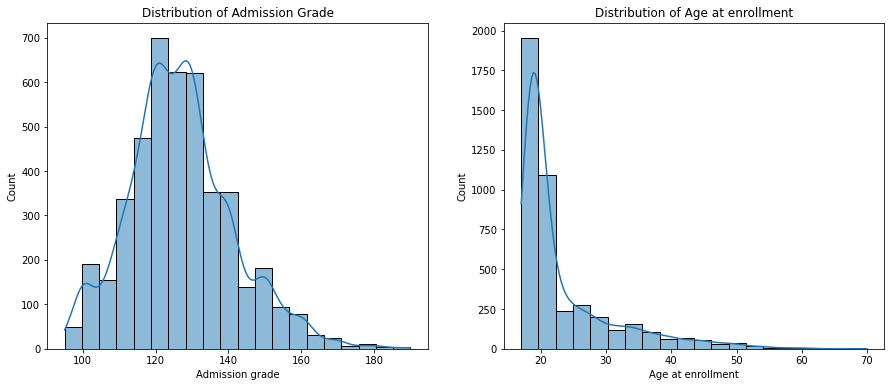

In [9]:
#EDA
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Admission grade'], bins=20, kde=True)
plt.title('Distribution of Admission Grade')
plt.subplot(1, 2, 2)
sns.histplot(df['Age at enrollment'], bins=20, kde=True)
plt.title('Distribution of Age at enrollment')
plt.show()

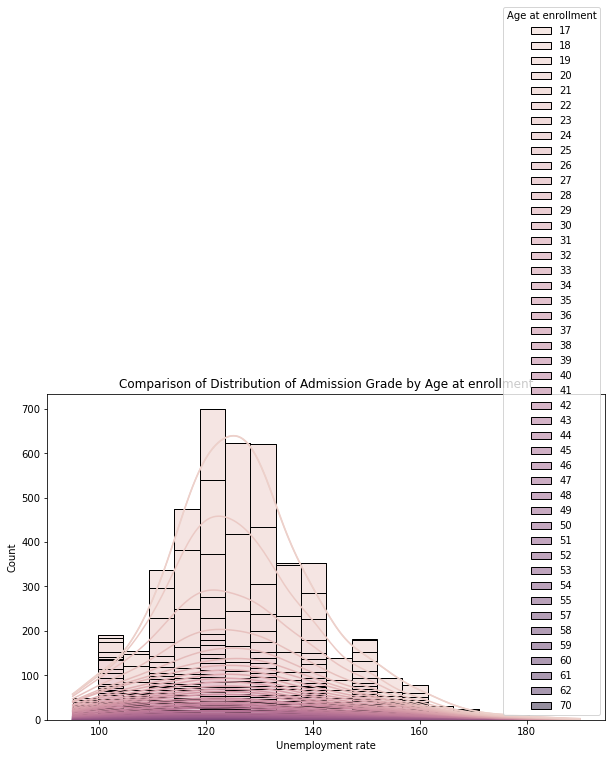

In [10]:
#Compare 2 charts of Admision Grade and Age at at enrollment
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Admission grade', hue='Age at enrollment', multiple="stack", bins=20, kde=True)
plt.title('Comparison of Distribution of Admission Grade by Age at enrollment')
plt.xlabel('Unemployment rate')
plt.ylabel('Count')
plt.show()

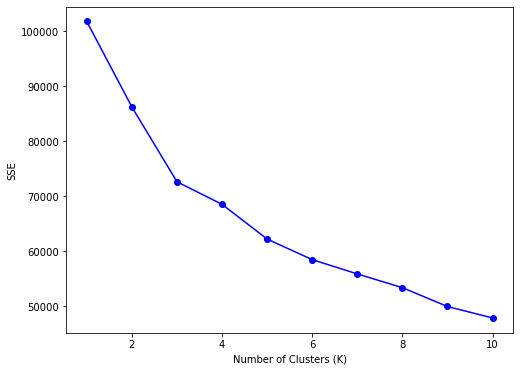

Best cluster is : 5


In [15]:
#K-Means
cluster_data = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Target'], errors='ignore')
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data_scaled)
    inertia_values.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.show()
findknee = KneeLocator(range(1, 11),
                       inertia_values,
                       curve="convex",
                       direction="decreasing")
print('Best cluster is :', findknee.elbow)

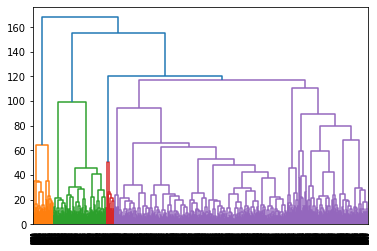

In [32]:
#Hierarichal 
df_encoded = pd.read_csv(r'C:\Users\asus\Documents\COLLEGE LIFE\SEMESTER 5\DATA MINING\data.csv', sep=';')
numeric_cols_for_clustering = df_encoded.select_dtypes(include=[int, float]).columns
scaled_df_hie = StandardScaler().fit_transform(df_encoded[numeric_cols_for_clustering])
hc_cluster = linkage(scaled_df_hie, method='ward')
dendrogram(hc_cluster)
plt.show()

In [13]:
for key, value in df.items():
    print(key, value)

Marital status 0       1
1       1
2       1
3       1
4       2
       ..
4419    1
4420    1
4421    1
4422    1
4423    1
Name: Marital status, Length: 4424, dtype: int64
Previous qualification 0       1
1       1
2       1
3       1
4       1
       ..
4419    1
4420    1
4421    1
4422    1
4423    1
Name: Previous qualification, Length: 4424, dtype: int64
Nacionality 0         1
1         1
2         1
3         1
4         1
       ... 
4419      1
4420    105
4421      1
4422      1
4423     22
Name: Nacionality, Length: 4424, dtype: int64
Admission grade 0       127.3
1       142.5
2       124.8
3       119.6
4       141.5
        ...  
4419    122.2
4420    119.0
4421    149.5
4422    153.8
4423    152.0
Name: Admission grade, Length: 4424, dtype: float64
Gender 0       1
1       1
2       1
3       0
4       0
       ..
4419    1
4420    0
4421    0
4422    0
4423    0
Name: Gender, Length: 4424, dtype: int64
Scholarship holder 0       0
1       0
2       0
3       0
4      

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


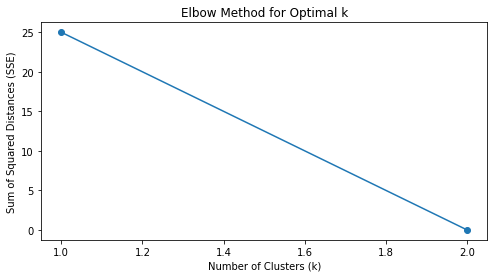

In [59]:
#ELBOW METHOD
features = df[['Admission grade', 'Age at enrollment']]
sse = []
k_range = range(1, min(11, len(features) + 1))  # Ensure the number of clusters doesn't exceed the number of samples

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [20]:
#1. KNN
X_class = pd.get_dummies(df.drop(['Admission grade'], axis=1)) 
y_class = df['Admission grade']
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=min(5, len(X_class_train)))
knn_model.fit(X_class_train, y_class_train)
knn_preds = knn_model.predict(X_class_test)
knn_accuracy = accuracy_score(y_class_test, knn_preds)
print(f'KNN Classification Accuracy: {knn_accuracy:.4f}')

KNN Classification Accuracy: 0.0282


In [41]:
#2. Apriori
df_apriori = df[['Admission grade']]
df_apriori['Admission grade'] = df_apriori['Admission grade'].astype(str).str.strip()
df_apriori_encoded = pd.get_dummies(df_apriori['Admission grade'])
frequent_itemsets = apriori(df_apriori_encoded, min_support=0.01, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
    support itemsets
0  0.026221  (100.0)
1  0.017405  (110.0)
2  0.032776  (120.0)
3  0.036618  (130.0)
4  0.034584  (140.0)
5  0.018309  (150.0)


C:\Users\asus\AppData\Local\Temp\ipykernel_10020\1850286075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['Admission grade'] = df_apriori['Admission grade'].astype(str).str.strip()
C:\Users\asus\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [52]:
#3. XGBoost
categorical_cols = ['Admission grade', 'Age at enrollment']
missing_cols = set(categorical_cols) - set(X_reg.columns)
if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
    # Apply one-hot encoding
    onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_reg_categorical = pd.get_dummies(X_reg[categorical_cols], columns=categorical_cols)
    X_reg_encoded = pd.concat([X_reg_numeric, X_reg_categorical], axis=1)

    # Proceed with the rest of your code (e.g., train-test split)
    X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_encoded, y_reg_encoded, test_size=0.2, random_state=42)

Missing columns: {'Admission grade'}
